Data in this set is fictional, although inspired by real animals

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

Importing observational data and getting familiar with data

In [2]:
Observations = pd.read_csv('observations.csv')
Observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
Observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [4]:
Observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [5]:
print(Observations.scientific_name.unique())
print(len(Observations.scientific_name.unique()))

['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']
5541


In [6]:
print(Observations.park_name.unique())
print(len(Observations.park_name.unique()))

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
4


There are 5541 different species observed between 4 different parks. 

There are 23296 rows in the dataframe. 

There are no null values in the data frame.




Importing species data and getting familiar with it.

In [7]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [8]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [9]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Streptopelia decaocto,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [10]:
print(species.scientific_name.unique())
print(len(species.scientific_name.unique()))

['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']
5541


In [11]:
print(species.common_names.unique())
print(len(species.common_names.unique()))

["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'Thicket Creeper, Virginia Creeper, Woodbine'
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur']
5504


In [12]:
print(species.conservation_status.unique())
print(len(species.conservation_status.unique()))

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
5


In [13]:
print(species.category.unique())
print(len(species.category.unique()))

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
7


In [14]:
species.groupby('category').scientific_name.nunique().reset_index()

,category,scientific_name
0,Amphibian,79
1,Bird,488
2,Fish,125
3,Mammal,176
4,Nonvascular Plant,333
5,Reptile,78
6,Vascular Plant,4262


In [15]:
### Replacing the null values for conservation status so that it can be included in analysis.
species.fillna('No Intervention', inplace=True)

In [16]:
species.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,No Intervention,5363
3,Species of Concern,151
4,Threatened,10


There are 5541 species in this dataframe. 

There are 7 different categories for the species. Plants make up the majority of the species.

There are 5 different conservation statuses (including the N/A values). Species of concern is the largest group after the species that need no intervention.

All of these species are in national parks in the U.S.

In [17]:
### Examining the conservation of different species to see if some are more endangered than others.
species['NeedHelp'] = species.conservation_status != 'No Intervention'

In [18]:
needhelp = species.groupby(['NeedHelp', 'category']).scientific_name.nunique().reset_index()
needhelp

,NeedHelp,category,scientific_name
0,False,Amphibian,72
1,False,Bird,413
2,False,Fish,115
3,False,Mammal,146
4,False,Nonvascular Plant,328
5,False,Reptile,73
6,False,Vascular Plant,4216
7,True,Amphibian,7
8,True,Bird,75
9,True,Fish,11


In [19]:
### Pivoting the table so that it is easier to make a comparison between the values for species needing help.
nhpivot = needhelp.pivot(columns = 'NeedHelp', index='category', values='scientific_name').reset_index()
nhpivot

NeedHelp,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [20]:
nhpivot.columns = ['category','not_protected','protected']
nhpivot

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [21]:
### Adding a percentage column to get the ratios
nhpivot['Ratio'] = round(nhpivot.protected/(nhpivot.protected+nhpivot.not_protected) * 100,2)
nhpivot

,category,not_protected,protected,Ratio
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


Mammals and birds are the most likely to be endangered. Mammals are slightly higher than birds. Is this difference significant?

In [22]:
### Run a chi squared test to check for significant differences.
table = [[30, 146], [75, 413]]
chi2, p, dof, exp = chi2_contingency(table)
print(p)

0.6875948096661336


This is not a significant difference. Both species are just as likely to become protected.

In [23]:
### Combing the two tables based on the scientific names
data = Observations.merge(species)
data

,scientific_name,park_name,observations,category,common_names,conservation_status,NeedHelp
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False
...,...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,No Intervention,False
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant,"Green Panic-Grass, Panic Grass",No Intervention,False
25629,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant,"Green Panic-Grass, Panic Grass",No Intervention,False
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant,"Green Panic-Grass, Panic Grass",No Intervention,False


Seperating the different types of species that need help and seeing how many observations of each has been seen.

In [24]:
endangered = data[data.conservation_status == 'Endangered']
endangered

,scientific_name,park_name,observations,category,common_names,conservation_status,NeedHelp
1400,Picoides borealis,Yosemite National Park,43,Bird,Red-Cockaded Woodpecker,Endangered,True
1401,Picoides borealis,Great Smoky Mountains National Park,15,Bird,Red-Cockaded Woodpecker,Endangered,True
1402,Picoides borealis,Yellowstone National Park,64,Bird,Red-Cockaded Woodpecker,Endangered,True
1403,Picoides borealis,Bryce National Park,24,Bird,Red-Cockaded Woodpecker,Endangered,True
2476,Rana sierrae,Yosemite National Park,42,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered,True
...,...,...,...,...,...,...,...
21155,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True
23160,Grus americana,Great Smoky Mountains National Park,13,Bird,Whooping Crane,Endangered,True
23161,Grus americana,Yellowstone National Park,57,Bird,Whooping Crane,Endangered,True
23162,Grus americana,Bryce National Park,24,Bird,Whooping Crane,Endangered,True


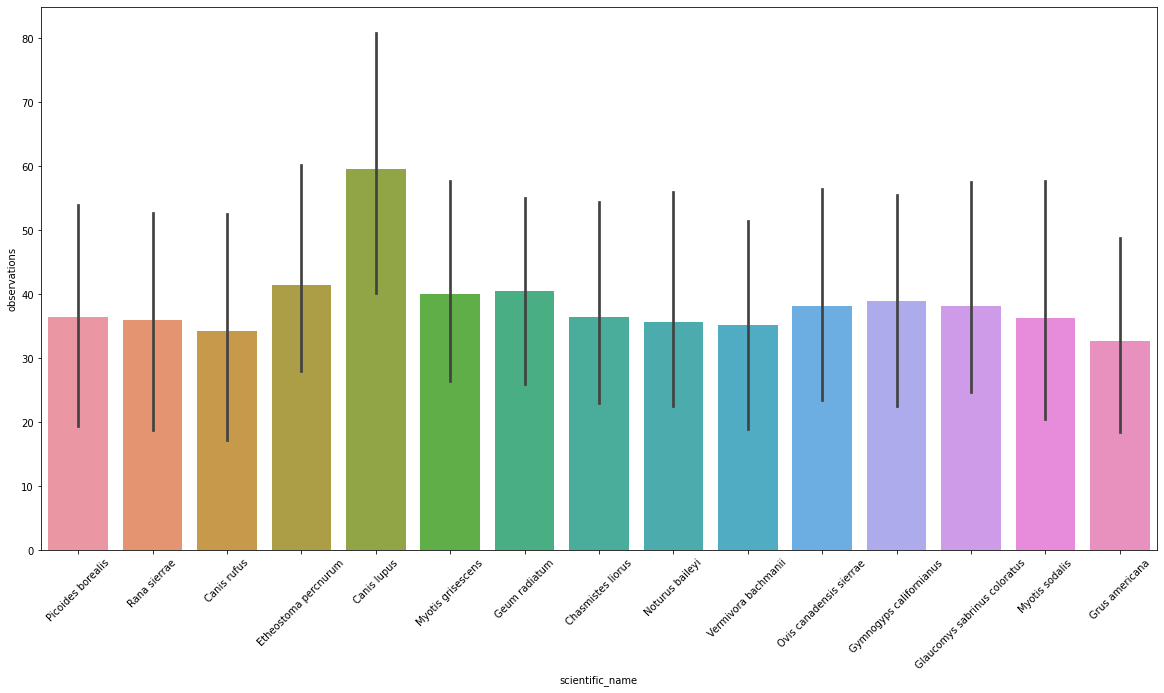

<Figure size 432x288 with 0 Axes>

In [25]:
fig = plt.subplots(figsize=(20,10))
sns.barplot(data = endangered, x = 'scientific_name', y ='observations')
plt.xticks(rotation=45)
plt.show()
plt.clf()

Canis lupus seems to have the most observations.

In [26]:
canis_lupus = endangered[endangered.scientific_name =='Canis lupus']
canis_lupus.common_names.unique()

array(['Gray Wolf', 'Gray Wolf, Wolf'], dtype=object)

In [27]:
in_recovery = data[data.conservation_status == 'In Recovery']
in_recovery

,scientific_name,park_name,observations,category,common_names,conservation_status,NeedHelp
6009,Canis lupus,Yosemite National Park,35,Mammal,"Gray Wolf, Wolf",In Recovery,True
6012,Canis lupus,Bryce National Park,27,Mammal,"Gray Wolf, Wolf",In Recovery,True
6015,Canis lupus,Bryce National Park,29,Mammal,"Gray Wolf, Wolf",In Recovery,True
6018,Canis lupus,Bryce National Park,74,Mammal,"Gray Wolf, Wolf",In Recovery,True
6021,Canis lupus,Great Smoky Mountains National Park,15,Mammal,"Gray Wolf, Wolf",In Recovery,True
6024,Canis lupus,Yellowstone National Park,60,Mammal,"Gray Wolf, Wolf",In Recovery,True
6027,Canis lupus,Yellowstone National Park,67,Mammal,"Gray Wolf, Wolf",In Recovery,True
6030,Canis lupus,Yellowstone National Park,203,Mammal,"Gray Wolf, Wolf",In Recovery,True
6033,Canis lupus,Great Smoky Mountains National Park,14,Mammal,"Gray Wolf, Wolf",In Recovery,True
6036,Canis lupus,Yosemite National Park,117,Mammal,"Gray Wolf, Wolf",In Recovery,True


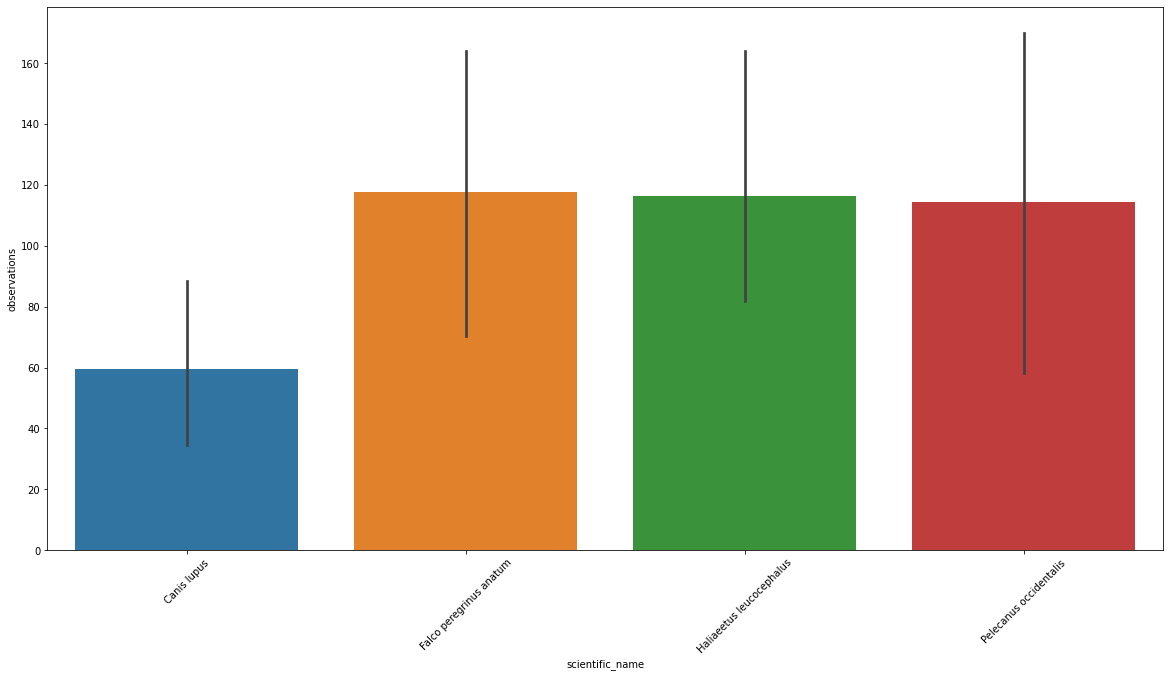

<Figure size 432x288 with 0 Axes>

In [28]:
fig = plt.subplots(figsize=(20,10))
sns.barplot(data = in_recovery, x = 'scientific_name', y ='observations')
plt.xticks(rotation=45)
plt.show()
plt.clf()

In [29]:
Falco = in_recovery[in_recovery.scientific_name =='Falco peregrinus anatum']
print(Falco.common_names.unique())

Haliaeetus = in_recovery[in_recovery.scientific_name =='Haliaeetus leucocephalus']
print(Haliaeetus.common_names.unique())

['American Peregrine Falcon']
['Bald Eagle']


In [30]:
concerned = data[data.conservation_status == 'Species of Concern']
concerned

,scientific_name,park_name,observations,category,common_names,conservation_status,NeedHelp
120,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern,True
121,Zizia trifoliata,Yellowstone National Park,238,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern,True
122,Zizia trifoliata,Bryce National Park,87,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern,True
123,Zizia trifoliata,Great Smoky Mountains National Park,80,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern,True
204,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern,True
...,...,...,...,...,...,...,...
25271,Lophocolea appalachiana,Yosemite National Park,129,Nonvascular Plant,Appalachian Lophocolea,Species of Concern,True
25604,Sium suave,Great Smoky Mountains National Park,40,Vascular Plant,"Common Waterparsnip, Hemlock Waterparsnip, Hem...",Species of Concern,True
25605,Sium suave,Bryce National Park,117,Vascular Plant,"Common Waterparsnip, Hemlock Waterparsnip, Hem...",Species of Concern,True
25606,Sium suave,Yellowstone National Park,211,Vascular Plant,"Common Waterparsnip, Hemlock Waterparsnip, Hem...",Species of Concern,True


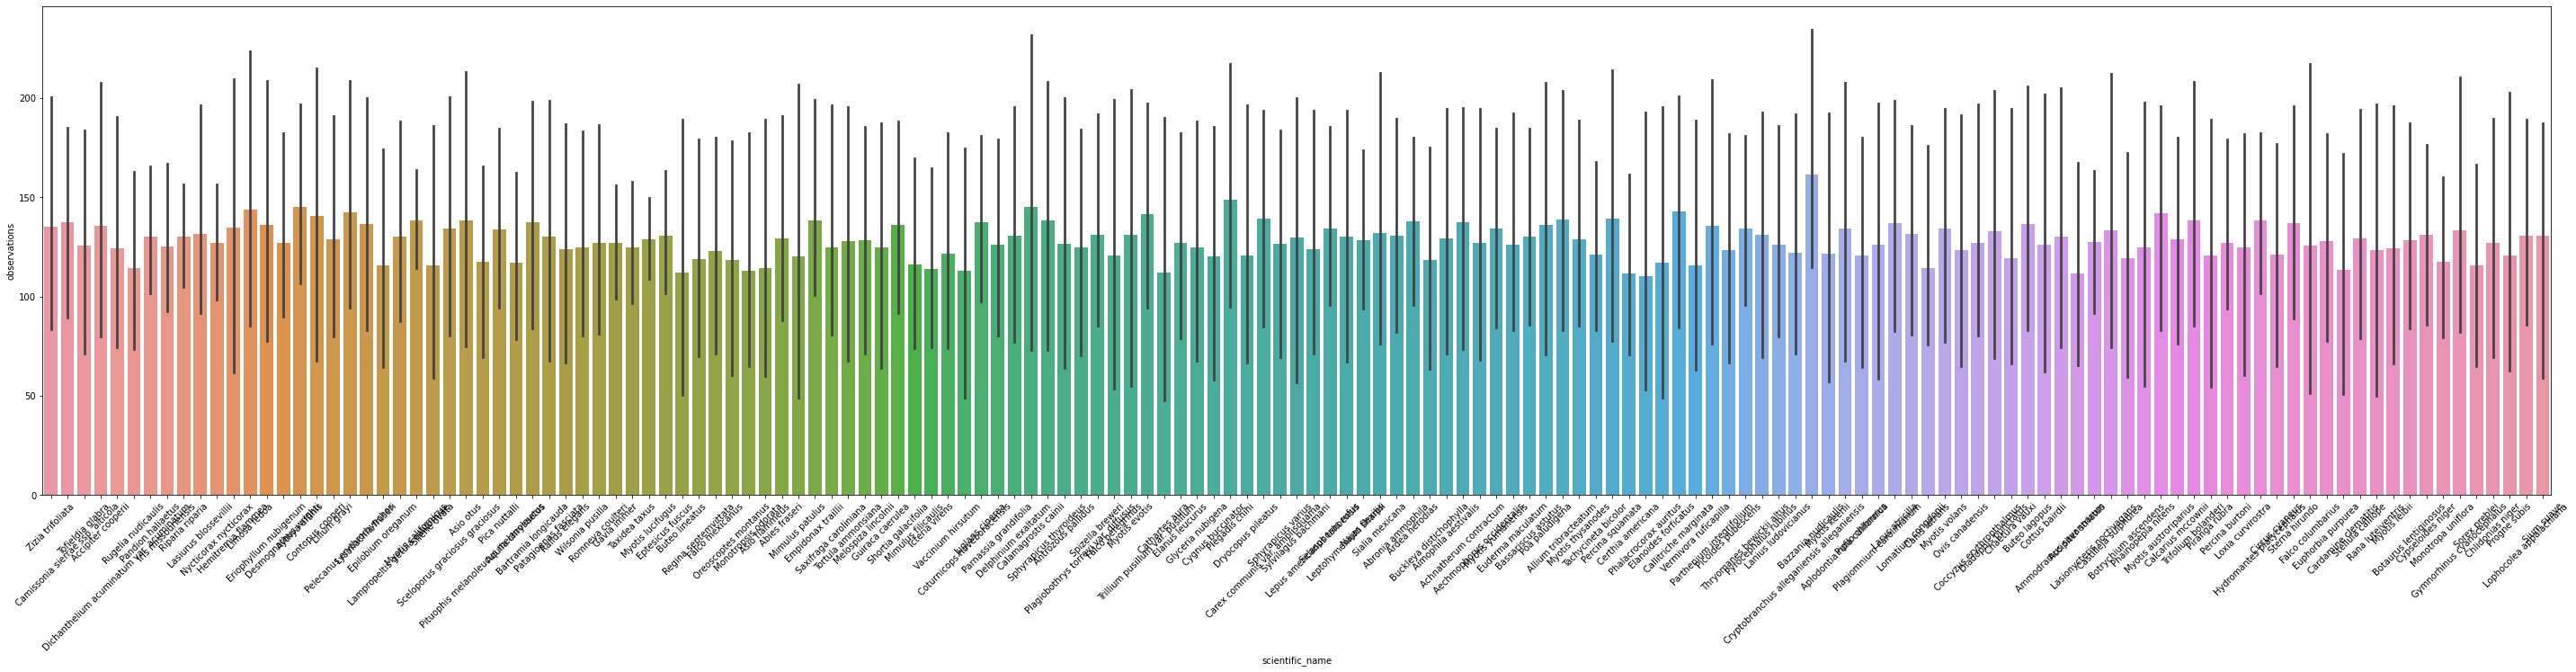

<Figure size 432x288 with 0 Axes>

In [31]:
fig = plt.subplots(figsize=(50,10))
sns.barplot(data = concerned, x = 'scientific_name', y ='observations')
plt.xticks(rotation=45)
plt.show()
plt.clf()

That's a significant amount of different species.

In [32]:
threatened = data[data.conservation_status == 'Threatened']
threatened

,scientific_name,park_name,observations,category,common_names,conservation_status,NeedHelp
857,Oncorhynchus mykiss,Yosemite National Park,118,Fish,Rainbow Trout,Threatened,True
859,Oncorhynchus mykiss,Bryce National Park,59,Fish,Rainbow Trout,Threatened,True
861,Oncorhynchus mykiss,Great Smoky Mountains National Park,61,Fish,Rainbow Trout,Threatened,True
863,Oncorhynchus mykiss,Yellowstone National Park,119,Fish,Rainbow Trout,Threatened,True
865,Oncorhynchus mykiss,Yellowstone National Park,253,Fish,Rainbow Trout,Threatened,True
867,Oncorhynchus mykiss,Bryce National Park,105,Fish,Rainbow Trout,Threatened,True
869,Oncorhynchus mykiss,Great Smoky Mountains National Park,39,Fish,Rainbow Trout,Threatened,True
871,Oncorhynchus mykiss,Yosemite National Park,59,Fish,Rainbow Trout,Threatened,True
1772,Rana draytonii,Great Smoky Mountains National Park,43,Amphibian,California Red-Legged Frog,Threatened,True
1773,Rana draytonii,Yosemite National Park,69,Amphibian,California Red-Legged Frog,Threatened,True


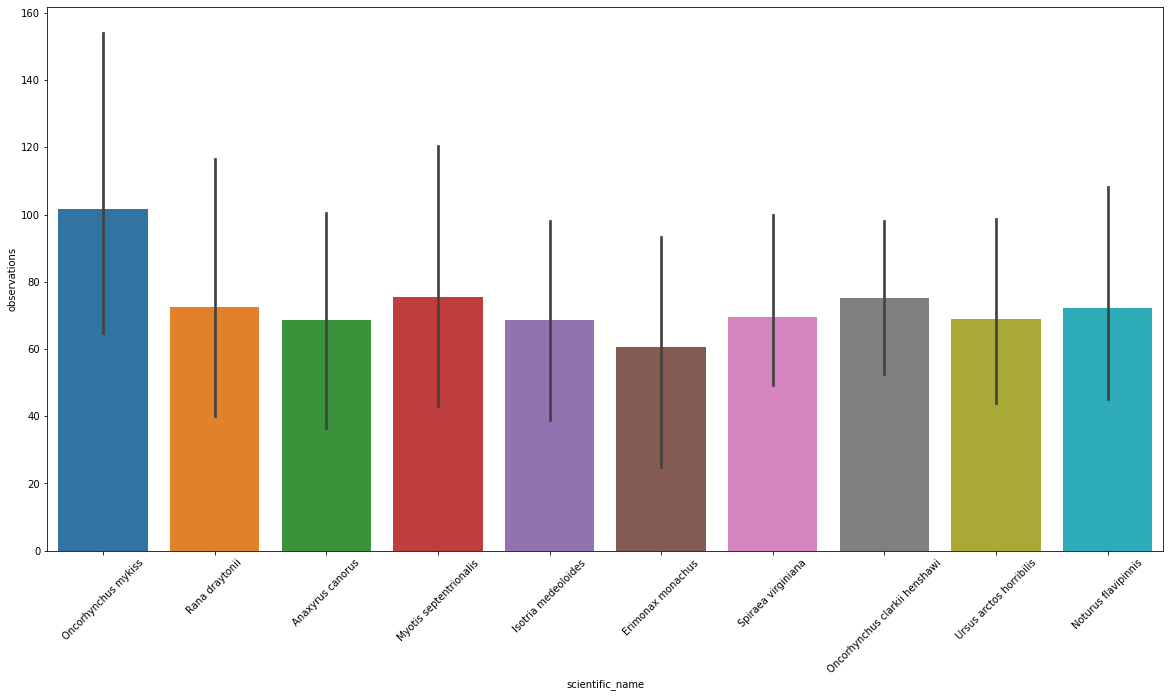

<Figure size 432x288 with 0 Axes>

In [33]:
fig = plt.subplots(figsize=(20,10))
sns.barplot(data = threatened, x = 'scientific_name', y ='observations')
plt.xticks(rotation=45)
plt.show()
plt.clf()

In [34]:
Oncorhynchus = threatened[threatened.scientific_name =='Oncorhynchus mykiss']
print(Oncorhynchus.common_names.unique())

['Rainbow Trout']


Let's compare the amount of observations based on the type of 'endangered' category.

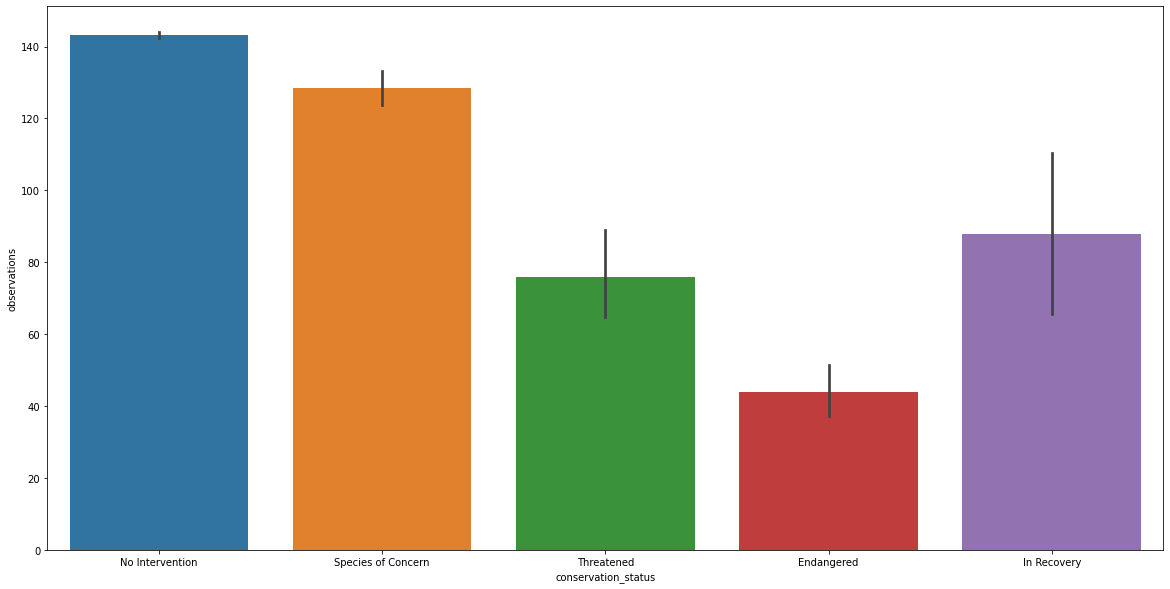

<Figure size 432x288 with 0 Axes>

In [35]:
fig = plt.figure(figsize=(20,10))
sns.barplot(data=data, x='conservation_status', y='observations')
plt.show()
plt.clf()

Let's see how many wolves are observed by park.

In [36]:
data['wolves'] = data.common_names.apply(lambda x: 'Wolf' in x)
data.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,NeedHelp,wolves
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False,False


In [37]:
data[data.wolves]

,scientific_name,park_name,observations,category,common_names,conservation_status,NeedHelp,wolves
4600,Canis rufus,Bryce National Park,30,Mammal,Red Wolf,Endangered,True,True
4601,Canis rufus,Yosemite National Park,34,Mammal,Red Wolf,Endangered,True,True
4602,Canis rufus,Great Smoky Mountains National Park,13,Mammal,Red Wolf,Endangered,True,True
4603,Canis rufus,Yellowstone National Park,60,Mammal,Red Wolf,Endangered,True,True
6008,Canis lupus,Yosemite National Park,35,Mammal,Gray Wolf,Endangered,True,True
6009,Canis lupus,Yosemite National Park,35,Mammal,"Gray Wolf, Wolf",In Recovery,True,True
6010,Canis lupus,Yosemite National Park,35,Mammal,"Gray Wolf, Wolf",Endangered,True,True
6011,Canis lupus,Bryce National Park,27,Mammal,Gray Wolf,Endangered,True,True
6012,Canis lupus,Bryce National Park,27,Mammal,"Gray Wolf, Wolf",In Recovery,True,True
6013,Canis lupus,Bryce National Park,27,Mammal,"Gray Wolf, Wolf",Endangered,True,True


There are other species that have wolf in their common name. Changing the request to include only mammals

In [38]:
wolves = data[(data.wolves) & (data.category == 'Mammal')] 
wolves

,scientific_name,park_name,observations,category,common_names,conservation_status,NeedHelp,wolves
4600,Canis rufus,Bryce National Park,30,Mammal,Red Wolf,Endangered,True,True
4601,Canis rufus,Yosemite National Park,34,Mammal,Red Wolf,Endangered,True,True
4602,Canis rufus,Great Smoky Mountains National Park,13,Mammal,Red Wolf,Endangered,True,True
4603,Canis rufus,Yellowstone National Park,60,Mammal,Red Wolf,Endangered,True,True
6008,Canis lupus,Yosemite National Park,35,Mammal,Gray Wolf,Endangered,True,True
6009,Canis lupus,Yosemite National Park,35,Mammal,"Gray Wolf, Wolf",In Recovery,True,True
6010,Canis lupus,Yosemite National Park,35,Mammal,"Gray Wolf, Wolf",Endangered,True,True
6011,Canis lupus,Bryce National Park,27,Mammal,Gray Wolf,Endangered,True,True
6012,Canis lupus,Bryce National Park,27,Mammal,"Gray Wolf, Wolf",In Recovery,True,True
6013,Canis lupus,Bryce National Park,27,Mammal,"Gray Wolf, Wolf",Endangered,True,True


Creating data for the total amount of views by park for plotting

In [39]:
parkviews = wolves.groupby('park_name').observations.sum().reset_index()
parkviews

,park_name,observations
0,Bryce National Park,420
1,Great Smoky Mountains National Park,190
2,Yellowstone National Park,1050
3,Yosemite National Park,622


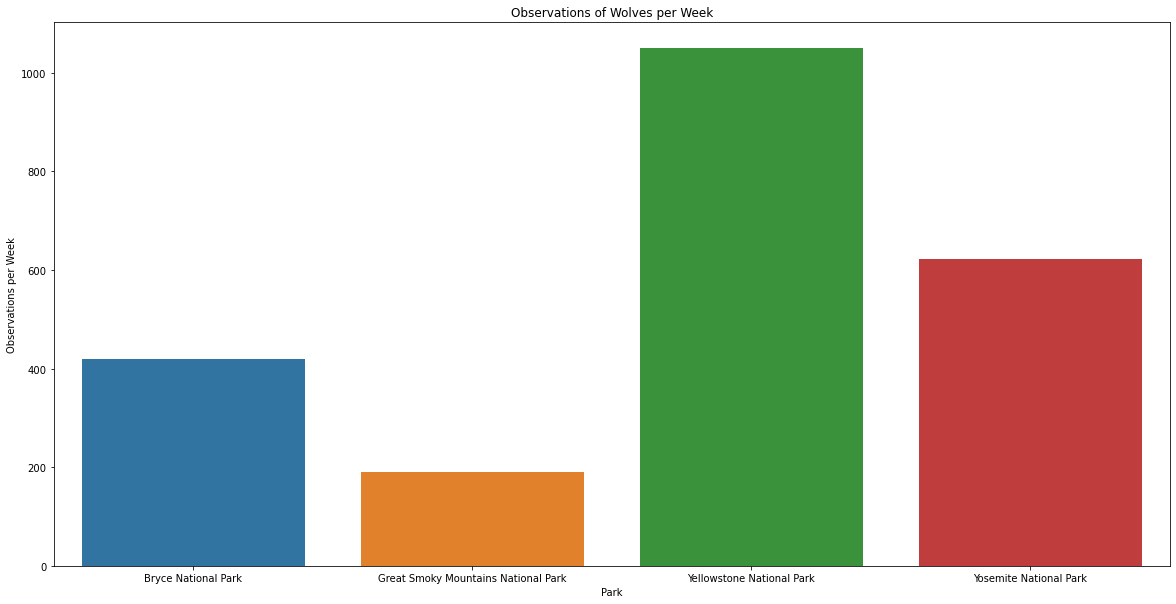

In [40]:
fig = plt.subplots(figsize=(20,10))
sns.barplot(data = parkviews, x='park_name', y='observations')
plt.title('Observations of Wolves per Week')
plt.xlabel('Park')
plt.ylabel('Observations per Week')
plt.show()